In [1]:
#setup
import numpy as np
import matplotlib.pyplot as plt
from GrafTo.run import Grafting
import json
import subprocess
import os

# set path for putting files of new system

ROOT = os.getcwd() 
FOLDER = f"{ROOT}/POLY" 

# setting plotting parameters
plt.rcParams.update({"font.size": 12,"text.usetex": False,"mathtext.fontset": "stixsans"}) 

COLORS = {"water,K0":"xkcd:cornflower", "water,K1":"xkcd:algae green", "water,K2":"xkcd:raspberry", "water,K5":"xkcd:amber",
          "vacuum,K0":"xkcd:cornflower", "vacuum,K1":"xkcd:algae green", "vacuum,K2":"xkcd:raspberry", "vacuum,K5":"xkcd:amber",
          "toluene,K0":"xkcd:cornflower", "toluene,K1":"xkcd:algae green", "toluene,K2":"xkcd:raspberry", "toluene,K5":"xkcd:amber"}

MARKERS = {"water":"o", "vacuum":"s"}

/Users/frasera/Ricerca/PhD_Programs/.venv/lib/python3.8/site-packages/Bio/Application/__init__.py:40: BiopythonDeprecationWarning: The Bio.Application modules and modules relying on it have been deprecated.

Due to the on going maintenance burden of keeping command line application
wrappers up to date, we have decided to deprecate and eventually remove these
modules.

We instead now recommend building your command line and invoking it directly
with the subprocess module.
  warnings.warn(


In [2]:
#make input file

PDI = { "POLY":1.3}
N = { "POLY":100 }

# If monodisperse, set 'monodisperse' to MOL_SIZE and 'polydisperse' to False
# If polydisperse, set 'polydisperse' to [PDI, N] and set 'monodisperse' to False

GRAFT_DENSITY, SAMPLE_NAME = 0.3, "POLY"
print(FOLDER)

data = {
    "root directory": FOLDER,
    "surface distance": 0.5,  # distance between chain beads, in nm
    "grafting density": GRAFT_DENSITY,  # grafting density
    "perturbation":0, # intensity to perturbate atom positions randomly
    "system name": SAMPLE_NAME,
    "matrix":
    {
        "file": False,  # path to matrix you wish to graft
        "size": [ 80, 80, 9 ]  # if 'file' is set to False and [lx,ly,lz] is given to 'size', creates a flat slab with lx x ly x lz nm^3 dimensions
    },

    "grafting method":
    {
        "to": False,  # code is ready but not implemented, attaches pre built molecules to the surface
        "from": True  # grows from the surface
    },

    "chain dispersity":
    {
        "monodisperse": [[184,0.6],[470,0.4]], #False, # For n-modal distributions: [[100,0.2],[30,0.3],[20,0.5]], # for mono distribution: [ MOLSIZE, N]
        "polydisperse": False#[ float(PDI[SAMPLE_NAME]) , int(N[SAMPLE_NAME]) ]
    },

    "atom names": {
        "polymer": [ "PDMS","DMS" ],
        "bulk": [ "BULK","N1B" ], 
        "layer":[ "LAY","N1L" ], 
        "under_polymer": [ "PDMS","N1L1" ]
    },

    "surface geometry": 
    {
        "cylindrical": False,
        "flat": True
    }
}

# save options to input file
with open(f'{ROOT}/input_grafter.json', 'w', encoding='utf-8') as f:
        json.dump(data, f, ensure_ascii=False, indent=4)

# if work folder doesn't exist, make one
subprocess.run(f"mkdir -p {FOLDER};",
               shell=True, executable="/bin/bash")

print("Input file created.")

/Users/frasera/Ricerca/PhD_Programs/POLY
Input file created.


Setting universe to: None

name: POLY
folder: /Users/frasera/Ricerca/PhD_Programs/POLY
surface distance: 0.5 nm
grafting density: 0.3 gps/nm^3
matrix: ['build', (80, 80, 9)]
dispersity: ['mono', [[184, 0.6], [470, 0.4]]]
surface geometry: flat
atom names: {'polymer': ['PDMS', 'DMS'], 'bulk': ['BULK', 'N1B'], 'layer': ['LAY', 'N1L'], 'under_polymer': ['PDMS', 'N1L1']}
tilt molecule: 0

Setting universe to: <Universe with 230400 atoms>

Using multiple chain sizes:
Using chain size 184 with fraction 0.6
Using chain size 470 with fraction 0.4
Adding molecules: 100.00%
Number of molecules: 528 - Number of spots: 12800 - Max. grafting dens.: 24.242

Setting universe to: <Universe with 388184 atoms>
Successfully wrote GRO file: /Users/frasera/Ricerca/PhD_Programs/POLY/initial_config.gro


(<Figure size 1400x400 with 3 Axes>,
 array([<Axes: xlabel='x, $\\AA$', ylabel='z, $\\AA$'>,
        <Axes: xlabel='y, $\\AA$', ylabel='z, $\\AA$'>,
        <Axes: xlabel='x, $\\AA$', ylabel='y, $\\AA$'>], dtype=object))

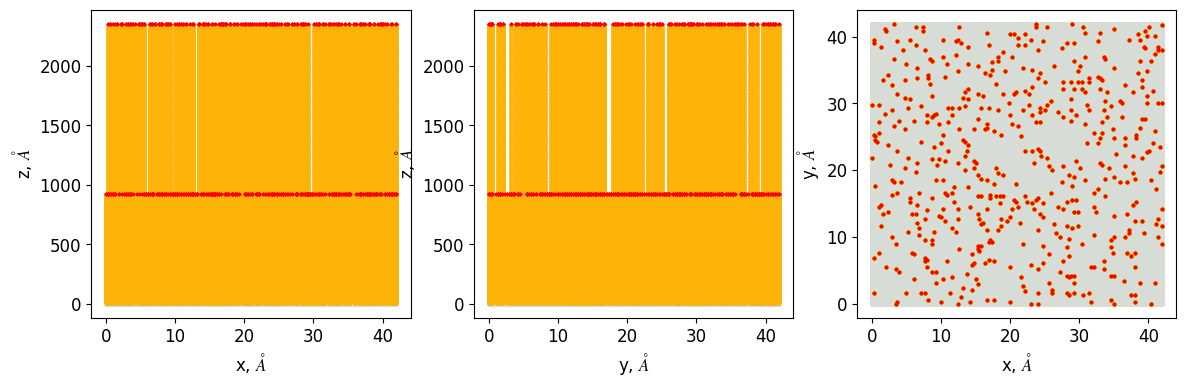

In [2]:
# build system using input file information
NewSystem = Grafting.NewSystem(root_dir=f"{ROOT}")   # instantiate new system class and set the working directory
NewSystem.writer_reader.read_inputs_grafter(f'{ROOT}/input_grafter.json')  # read input parameters

NewSystem.build_surface()
NewSystem.graft_matrix()
NewSystem.out_topology()
# NewSystem.make_itps_PDMS(NewSystem.molSizes)

NewSystem.plotter.plot_system(colors={"N1L":"xkcd:light gray","N1L1":"xkcd:light gray","N1B":"xkcd:light gray","DMS":"xkcd:amber","END":"red"}, zorders={"N1L":1,"N1L1":1,"N1B":1,"DMS":2,"END":3})

<Axes: xlabel='N', ylabel='Count'>

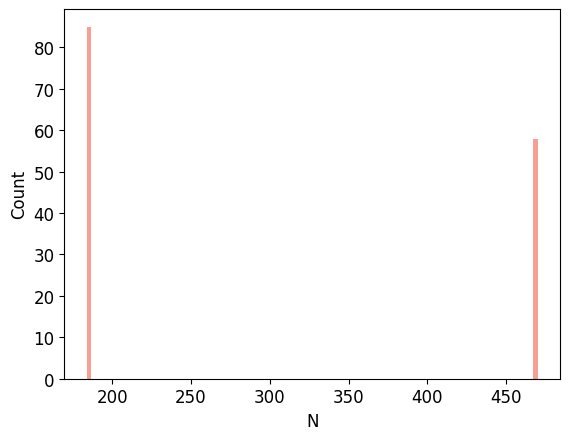

In [8]:
NewSystem.plot_mol_distribution() # plot distribution of chain sizes